In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
df.drop(labels='name', axis=1, inplace=True)

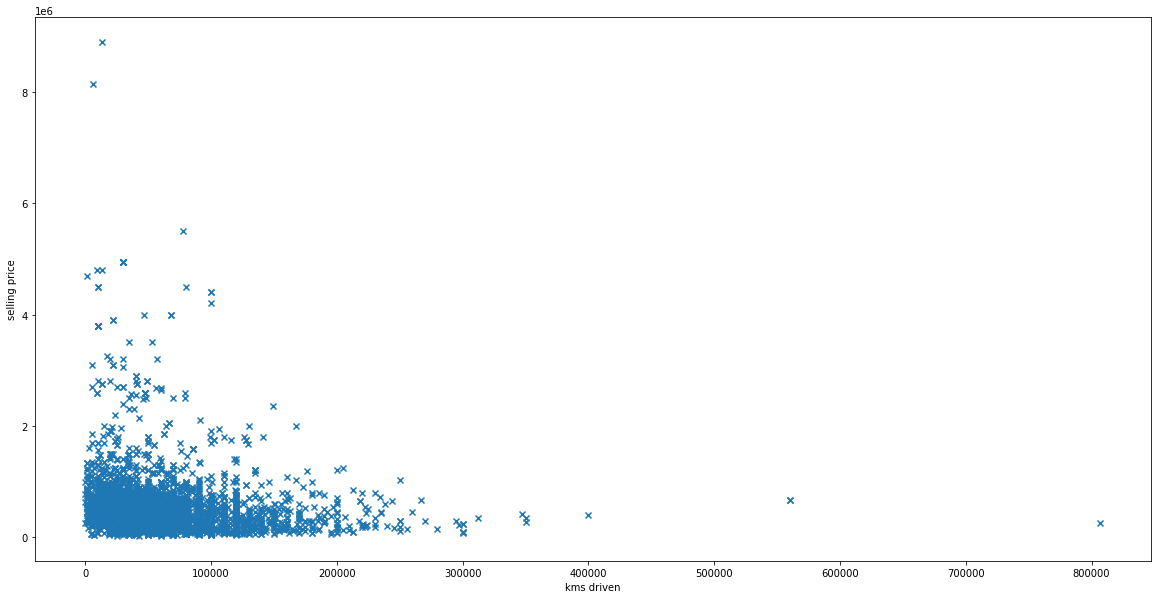

In [6]:
plt.figure(1, figsize=(20, 10))
plt.scatter(x=df['km_driven'], y=df['selling_price'], marker='x')
plt.xlabel('kms driven')
plt.ylabel('selling price')
plt.show()

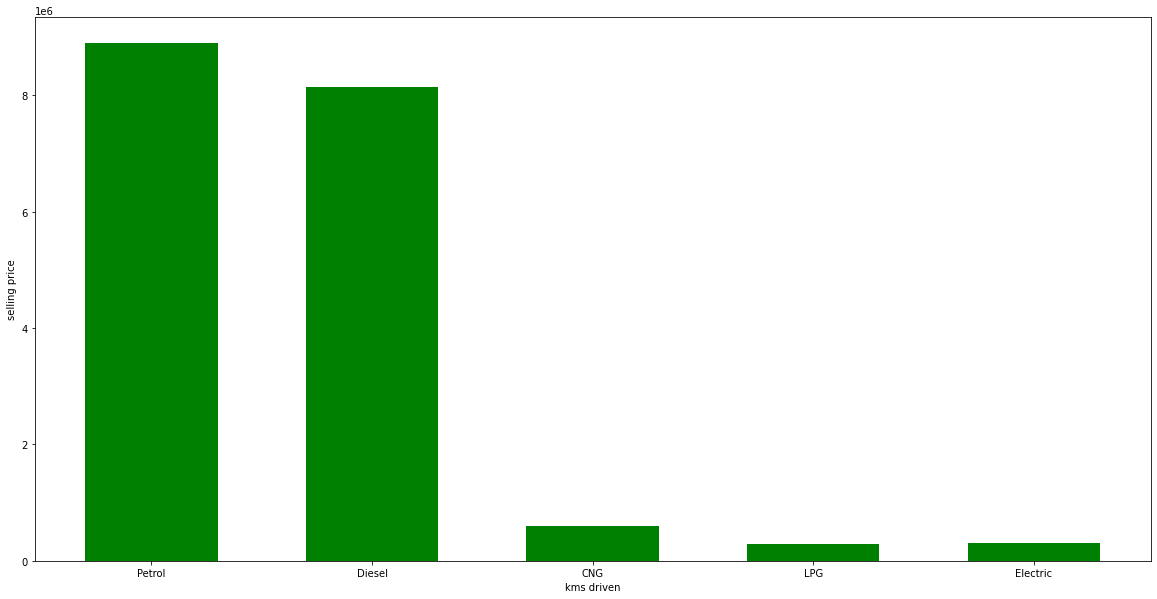

In [7]:
plt.figure(1, figsize=(20, 10))
plt.bar(df['fuel'], df['selling_price'], width=0.6, color='green')
plt.xlabel('kms driven')
plt.ylabel('selling price')
plt.show()

In [8]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [9]:
from sklearn import preprocessing

In [10]:
processed_df = df[['year', 'selling_price','km_driven','fuel', 'seller_type', 'transmission', 'owner']]

In [11]:
processed_df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [12]:
data = processed_df.values
x = data[:,:6]
y = data[:,6]

In [13]:
processed_df = pd.get_dummies(processed_df,columns=['fuel','transmission','seller_type','owner'],drop_first=True)

In [14]:
processed_df.head()

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,0,0,0,1,1,1,0,0,0,0,0
1,2007,135000,50000,0,0,0,1,1,1,0,0,0,0,0
2,2012,600000,100000,1,0,0,0,1,1,0,0,0,0,0
3,2017,250000,46000,0,0,0,1,1,1,0,0,0,0,0
4,2014,450000,141000,1,0,0,0,1,1,0,0,1,0,0


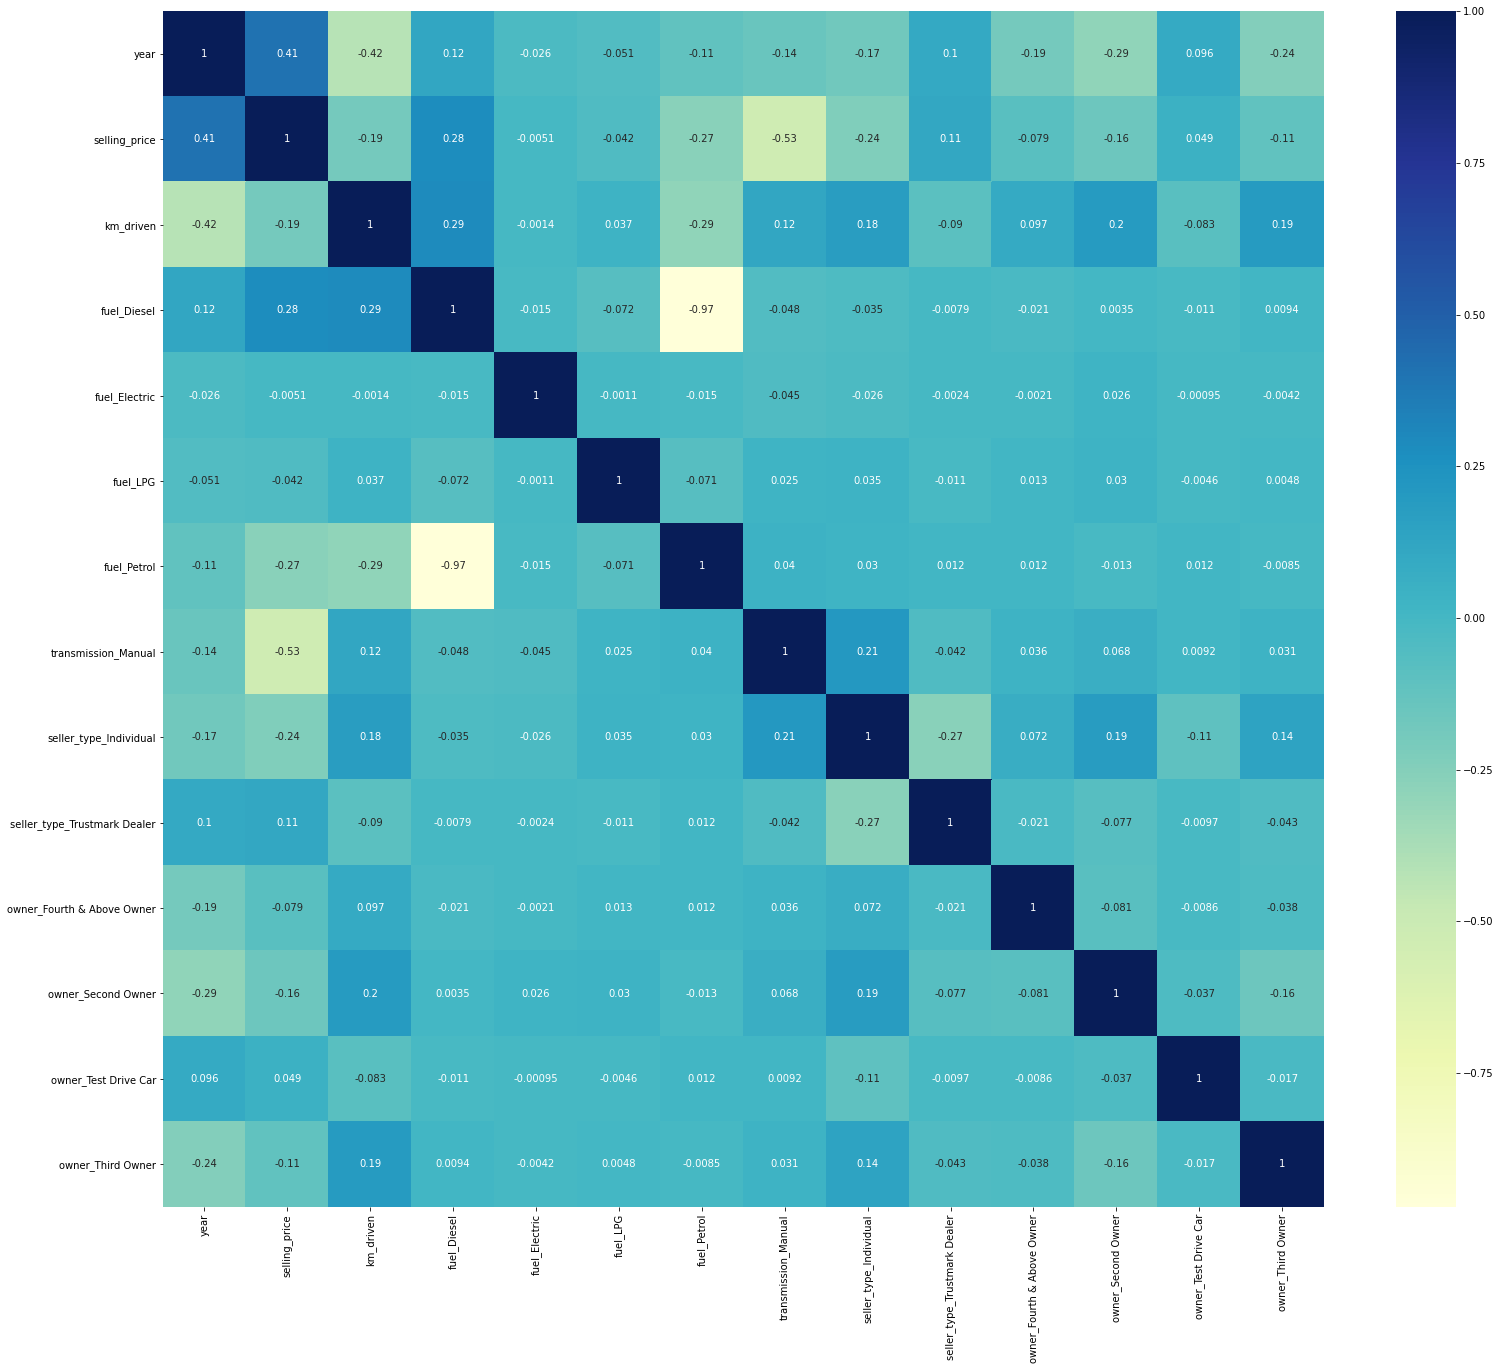

In [15]:
correlations = processed_df.corr()

indx=correlations.index
plt.figure(figsize=(26,22))
sns.heatmap(processed_df[indx].corr(),annot=True,cmap="YlGnBu")

In [16]:
data = processed_df.values
x = data[:,2:14]
y = data[:,1]

In [17]:
x

array([[ 70000,      0,      0, ...,      0,      0,      0],
       [ 50000,      0,      0, ...,      0,      0,      0],
       [100000,      1,      0, ...,      0,      0,      0],
       ...,
       [ 83000,      0,      0, ...,      1,      0,      0],
       [ 90000,      1,      0, ...,      0,      0,      0],
       [ 40000,      0,      0, ...,      0,      0,      0]])

In [18]:
x.shape

(4340, 12)

In [19]:
y

array([ 60000, 135000, 600000, ..., 110000, 865000, 225000])

In [20]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [21]:
print(x)

[[ 0.08113906 -0.99219635 -0.01518117 ... -0.58480026 -0.06270928
  -0.27444872]
 [-0.3476891  -0.99219635 -0.01518117 ... -0.58480026 -0.06270928
  -0.27444872]
 [ 0.7243813   1.00786503 -0.01518117 ... -0.58480026 -0.06270928
  -0.27444872]
 ...
 [ 0.35987736 -0.99219635 -0.01518117 ...  1.70998557 -0.06270928
  -0.27444872]
 [ 0.50996722  1.00786503 -0.01518117 ... -0.58480026 -0.06270928
  -0.27444872]
 [-0.56210318 -0.99219635 -0.01518117 ... -0.58480026 -0.06270928
  -0.27444872]]


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train, test, train_price, test_price = train_test_split(x,y, test_size = 0.05) 

In [24]:
print(train.shape[0], test.shape[0])

4123 217


In [25]:
print(train.shape)

(4123, 12)


In [26]:
from sklearn import linear_model

In [27]:
from sklearn.metrics import r2_score

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
second_order = PolynomialFeatures(2)
train_order_2 = second_order.fit_transform(train)

In [30]:
lr_2 = linear_model.LinearRegression()
lr_2.fit(train_order_2, train_price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
test_order_2 = second_order.fit_transform(test)
y_hat_2 = lr_2.predict(test_order_2)

In [37]:
r2_score(test_price,y_hat_2)

0.6168079383911376

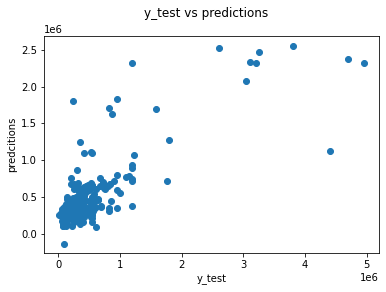

In [38]:
fig = plt.figure()
fig.suptitle('y_test vs predictions')
plt.xlabel('y_test')
plt.ylabel('predcitions')
plt.scatter(test_price,y_hat_2)